Práctica 1: Regresión lineal
===
Autores: Lidia Concepción Echeverría y Francisco Ponce Belmonte
---

In [1]:
%matplotlib notebook
import csv
import numpy as np
from pandas.io.parsers import read_csv
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

Carga y muestra de datos.

In [12]:
def carga_csv(filename):
    valores = read_csv(filename,header= None).values
    return valores.astype(float)

In [13]:
val = carga_csv("ex1data1.csv")  
Y = val[:,1]
aux = val[:,0]
aux = np.reshape(aux, ((len(aux),1)))
X = np.insert(aux, 0, np.ones(val.shape[0]), axis=1)
th =np.zeros((2,1))

<IPython.core.display.Javascript object>


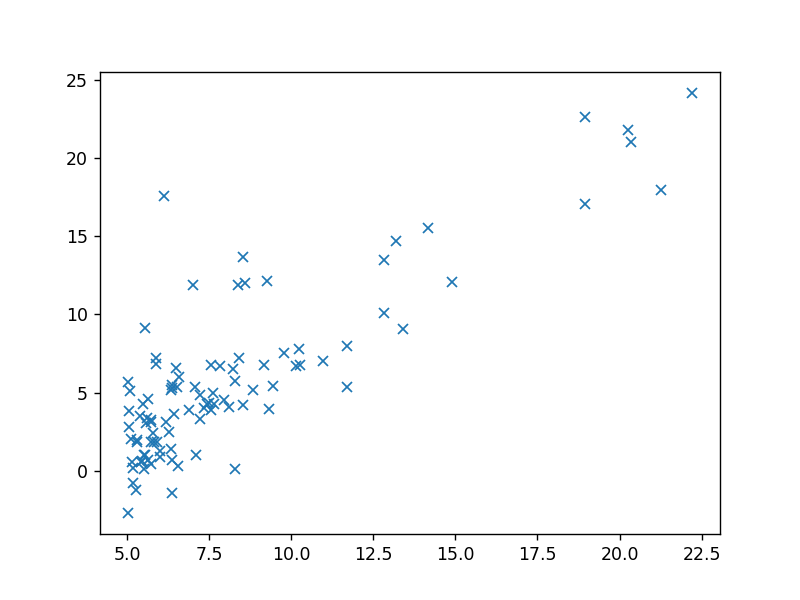

In [14]:
plt.figure()
plt.plot(val[:,0], Y, 'x')

Función que calcula el valor de la hipótesis h.

In [16]:
def H(th,v):
    h = np.dot(v,th)
    return h

Función de coste.

In [17]:
def J(th,x,y):
    h = H(th,x)
    s = np.sum(np.square(np.ravel(h) - y))
    j = s/(2*len(y))
    return j

Implementación método de descenso de gradiente.

In [20]:
def gradiente(th,x,y,alpha = 0.01):
    h = H(th,x)
    s0 = np.sum(np.ravel(h)-y)
    s1 = np.sum((np.ravel(h)-y) * x[:,1])
    th[0] -= (s0*alpha)/len(y)
    th[1] -= (s1*alpha)/len(y)
    return th

Durante las 1500 iteraciones, podemos ver cómo el valor de theta sufre modificaciones cada vez menores, hasta casi detenerse éstas. Con más iteraciones, el valor terminaría normalizándose llegado un punto.

In [21]:
for i in range(1500):
    th = gradiente(th,X,Y)
    print(J(th, X,Y))

4.483365143354072
4.483342113372951
4.483319166344494
4.483296301969908
4.4832735199514815
4.48325081999257
4.4832282017975995
4.483205665072063
4.483183209522512
4.483160834856554
4.483138540782852
4.483116327011114
4.483094193252103
4.483072139217613
4.483050164620483
4.483028269174586
4.483006452594818
4.482984714597113
4.482963054898421
4.482941473216713
4.482919969270979
4.482898542781215
4.482877193468432
4.48285592105464
4.4828347252628555
4.482813605817089
4.482792562442349
4.48277159486463
4.4827507028109155
4.482729886009173
4.482709144188348
4.482688477078366
4.4826678844101195
4.482647365915478
4.48262692132727
4.482606550379288
4.482586252806286
4.482566028343968
4.482545876728999
4.482525797698982
4.482505790992475
4.482485856348967
4.482465993508897
4.482446202213629
4.482426482205467
4.482406833227634
4.482387255024285
4.482367747340495
4.482348309922258
4.482328942516478
4.482309644870977
4.4822904167344815
4.482271257856623
4.482252167987937
4.482233146879857
4.482214

4.477010689287115
4.477010547682834
4.4770104065886045
4.477010266002587
4.477010125922952
4.477009986347876
4.477009847275542
4.477009708704139
4.477009570631862
4.477009433056912
4.4770092959775
4.47700915939184
4.477009023298153
4.4770088876946685
4.47700875257962
4.477008617951247
4.477008483807799
4.4770083501475275
4.477008216968692
4.477008084269559
4.477007952048401
4.477007820303497
4.47700768903313
4.477007558235591
4.477007427909177
4.47700729805219
4.477007168662942
4.477007039739746
4.477006911280925
4.477006783284804
4.477006655749718
4.477006528674005
4.477006402056014
4.477006275894091
4.477006150186598
4.477006024931895
4.477005900128352
4.477005775774344
4.477005651868254
4.4770055284084656
4.4770054053933706
4.477005282821371
4.477005160690867
4.47700503900027
4.477004917747997
4.477004796932467
4.477004676552108
4.477004556605352
4.477004437090637
4.477004318006406
4.477004199351111
4.477004081123205
4.477003963321149
4.477003845943409
4.477003728988458
4.4770036124

Muestra de datos, con 1500 iteraciones y un valor de alfa de 0,01.

<IPython.core.display.Javascript object>


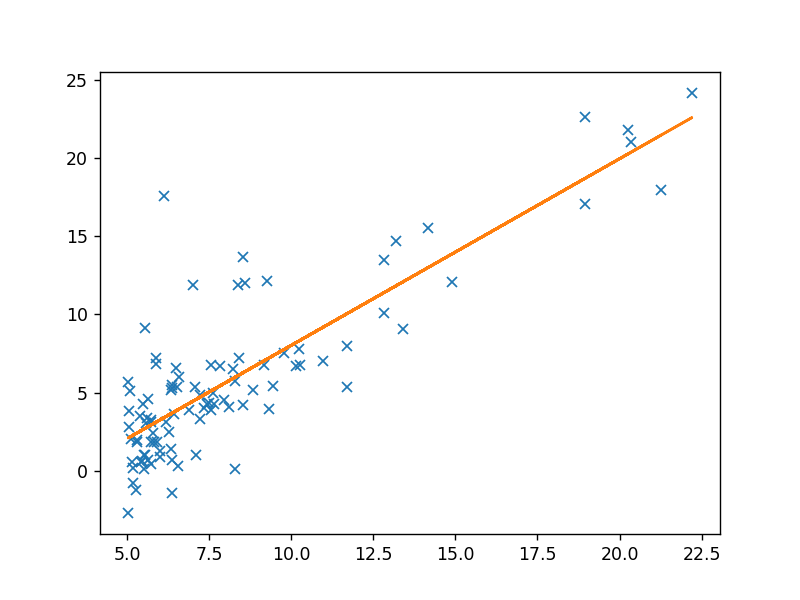

In [22]:
plt.figure()
plt.plot(val[:,0], Y, 'x')
plt.plot(val[:,0],th[0]+th[1]*val[:,0])

Regresión con varias variables
---
Función de normalización de atributos y carga de datos.

In [25]:
def norm(X):
    X_norm = X.copy()
    mu = [np.mean(X[:,0]),np.mean(X[:,1])]
    sigma = [np.std(X[:,0]),np.std(X[:,1])]
    X_norm[:,0] = (X[:,0] - mu[0])/sigma[0]
    X_norm[:,1] = (X[:,1] - mu[1])/sigma[1]
    return X_norm, mu, sigma

In [26]:
val2 = carga_csv("ex1data2.csv")
Y = val2[:,2]
X_norm, mu, sigma = norm(val2[:,:2])
X = np.insert(X_norm, 0, np.ones(val2.shape[0]), axis=1)
th =np.zeros((3,1))

Funciones de coste y de descenso de gradiente (versión vectorizada para soportar varios valores).

In [32]:
def J_varios(th,x,y):
    h = H(th,x)
    aux = np.ravel(h)-y
    aux = np.reshape(aux, ((len(aux),1)))
    j = np.dot(aux.T,aux)/(2*len(y))
    return j[0][0]

In [33]:
def gradiente_varios(th,x,y,alpha = 0.01):
    m = len(y)
    h = np.ravel(H(th,x))
    s0 = np.sum(h - y)
    s1 = np.sum((h - y) * x[:,1])
    s2 = np.sum((h - y) * x[:,2])

    th[0] -= (s0*alpha)/m
    th[1] -= (s1*alpha)/m
    th[2] -= (s2*alpha)/m
    return th

In [34]:
def grad_desc(th,X,Y):
    for i in range(1500):
        th = gradiente_varios(th,X,Y)
    return th[:,0]

Función de cálculo de la ecuación normal.

In [35]:
def inversa (x,y):
    return np.matmul(np.matmul(np.linalg.pinv(np.matmul(x.T,x)), x.T), y)

Función de predicción de resultados, dados dos valores y sus pesos.

In [36]:
def prediccion(th, x1, x2):
    return th[0] + th[1]*x1 + th[2]*(np.square(x2))

Como podemos ver, los resultados dados por los cálculos realizados mediante la ecuación normal, y los realizados por la función de descenso de gradiente, son realmente parecidos.

In [37]:
th_i = inversa(X,Y)
th_gr = grad_desc(th,X,Y)
print(prediccion(th_i, 1650, 3))
print(prediccion(th_gr, 1650, 3))

180870071.6407961
180742500.589848


Para finalizar, podemos comprobar los resultados de las predicciones en la siguiente gráfica 3-D. Se puede apreciar que las predicciones realizadas por ambos métodos prácticamente se superponen y dan una estimación muy parecida al valor real del precio.

<IPython.core.display.Javascript object>


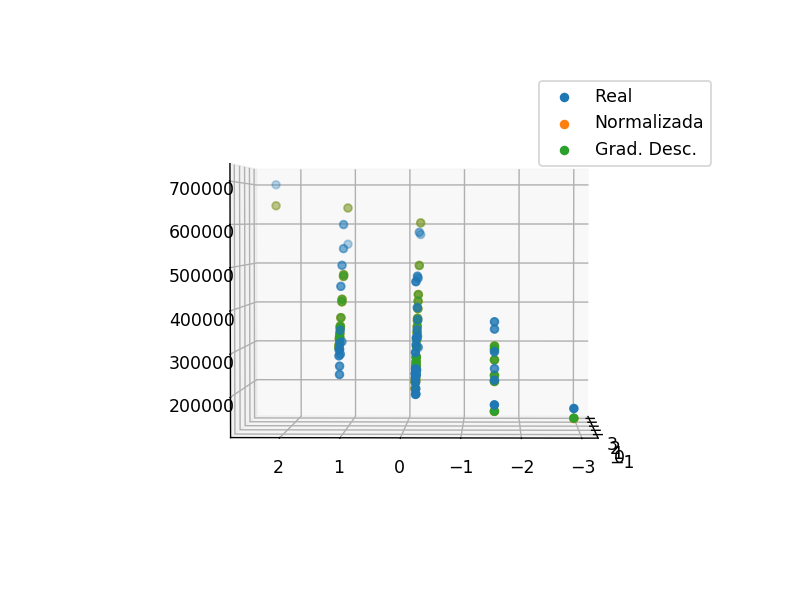

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], Y)
ax.scatter(X[:,1], X[:,2], prediccion(th_i, X[:,1], X[:,2]))
ax.scatter(X[:,1], X[:,2], prediccion(th_gr, X[:,1], X[:,2]))
ax.legend(['Real', 'Normalizada', 'Grad. Desc.'])